In [4]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from numpy.random import randn

# statistic lib
from scipy import stats

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# command
%matplotlib inline

In [2]:
dataset = randn(25)
dataset

array([ 0.22835642, -0.76324496,  1.30066472,  1.49466035, -1.4734521 ,
        1.8258382 ,  1.10105128, -1.20712353, -0.1959857 , -0.5516239 ,
        0.31806626, -1.76476088,  0.78009625,  1.36392918,  0.41722639,
       -2.28117087, -0.52562698,  0.09779495, -0.45541162,  0.3490435 ,
        0.45498503,  0.05179858,  1.62918708, -0.49314703,  0.3229483 ])

(0.0, 1.0)

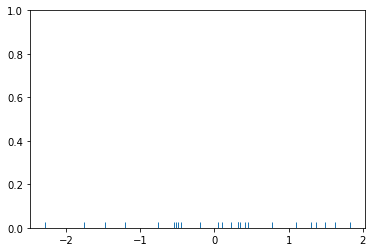

In [7]:
sns.rugplot(dataset)
plt.ylim(0,1)

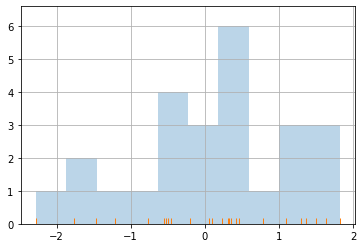

In [9]:
plt.hist(dataset,alpha = 0.3)
sns.rugplot(data = dataset)
plt.grid()
# The histogram sets up 10 bins and then just count how many ticks appeared in each bin, setting the height of each bar

(0.0, 1.0)

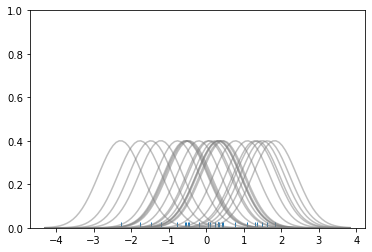

In [10]:
# The kernel density plot will represent each tick mark with a gaussian basis function. Let's see how we would do this manually

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

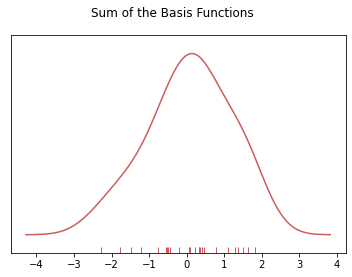

In [12]:

# To get the kde plot we can sum these basis functions.



# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list ,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<AxesSubplot:ylabel='Density'>

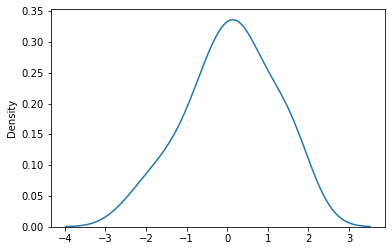

In [13]:
# SHORT CUT WITHOUT THE ABOVE STEPS
sns.kdeplot(dataset)

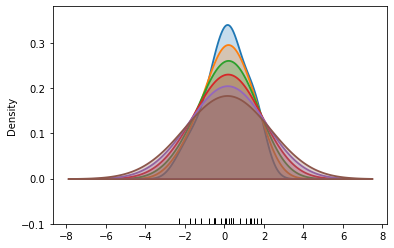

In [19]:
# # We can adjust the bandwidth of the sns kde to make the kde plot more or less sensitive to high frequency

sns.rugplot(dataset, color='black')

for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw_method = bw, lw = 1.8, label = bw, shade = True)

F:\Anaconda\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:1666: UserWarning: Support for alternate kernels h

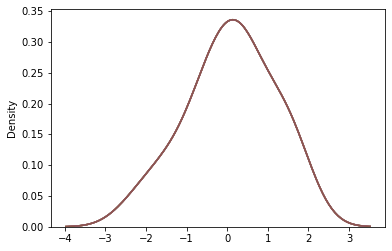

In [18]:
# We can also choose different kernels

kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

# More info on types
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

for kern in kernel_options:
    sns.kdeplot(dataset, kernel = kern, label = kern)

<AxesSubplot:ylabel='Density'>

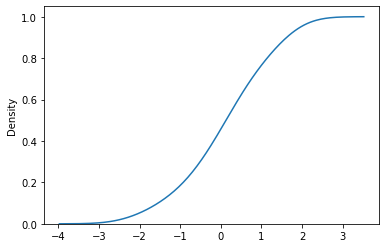

In [21]:
# Finally we can also use kde plot to create a cumulative distribution function (CDF) of the data

# URL for info on CDF
url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

sns.kdeplot(dataset,cumulative=True)

<AxesSubplot:xlabel='X', ylabel='Y'>

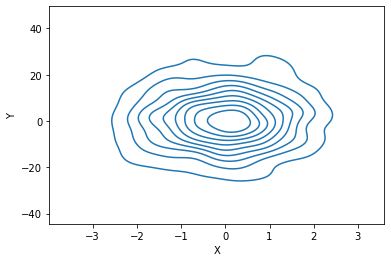

In [26]:
# Multivariate Density Estimation using kdeplot
# We can also use kdeplot for multidimensional data. Lets see how it works!

# Let's create a new dataset

# Mean center of data
mean = [0,0]

# Diagonal covariance
cov = [[1,0],[0,100]]

# Create dataset using numpy
dataset2 = np.random.multivariate_normal(mean,cov,1000)

# Bring back our old friend pandas
dframe = pd.DataFrame(dataset2,columns=['X','Y'])

# Plot our dataframe
sns.kdeplot(data = dframe, x = 'X', y = 'Y')

<AxesSubplot:xlabel='X', ylabel='Y'>

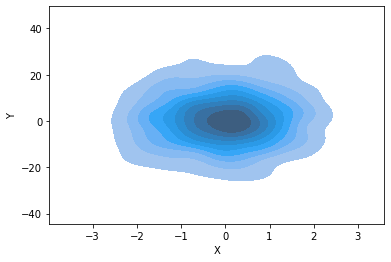

In [27]:
sns.kdeplot(data = dframe, x = 'X', y = 'Y', shade = True)

<AxesSubplot:xlabel='X', ylabel='Y'>

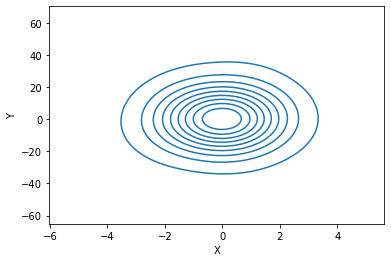

In [34]:
# specify bandwidth
sns.kdeplot(data = dframe, bw_method = 1, x = 'X', y = 'Y')

<AxesSubplot:xlabel='X', ylabel='Y'>

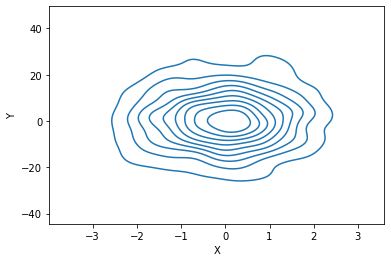

In [32]:
# Or just use silverman again
sns.kdeplot(data = dframe, bw_method = 'silverman', x = 'X', y = 'Y')

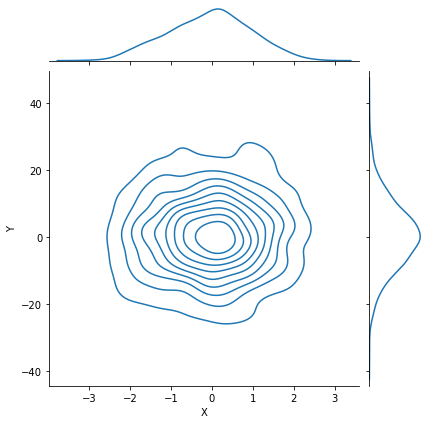

In [37]:
# We can also create a kde joint plot, simliar to the hexbin plots we saw before

sns.jointplot(x = 'X',y = 'Y',data = dframe,kind='kde')